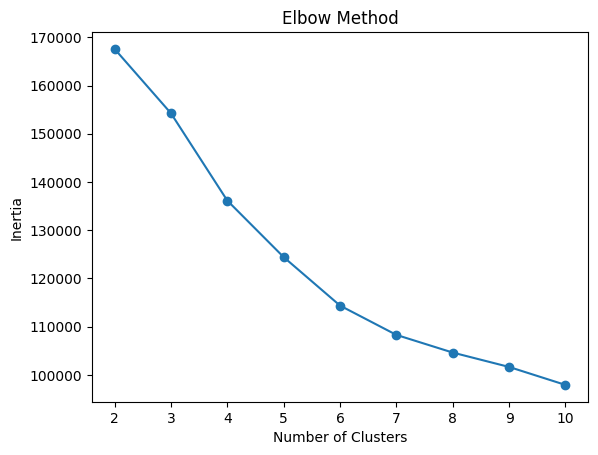

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
cluster,,,,,,,,,,
0,0.590067,0.724034,-6.780397,0.177970,0.256167,0.020578,0.590585,0.549473,122.259298,244677.263917
1,0.675022,0.731048,-5.968412,0.101839,0.158908,0.025086,0.153031,0.608650,123.387786,219246.117252
2,0.329525,0.201739,-21.969292,0.046315,0.814519,0.815710,0.142069,0.172869,105.099147,219158.410673
3,0.541194,0.431153,-9.901554,0.058895,0.552390,0.018583,0.146671,0.383328,115.678893,231576.269360


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("Spotify_Youtube.csv")
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
df_cleaned = df[features].dropna()

X_scaled = StandardScaler().fit_transform(df_cleaned)

# Elbow method 
inertia = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(2, 11)]
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

df_cleaned.groupby('cluster')[features].mean()



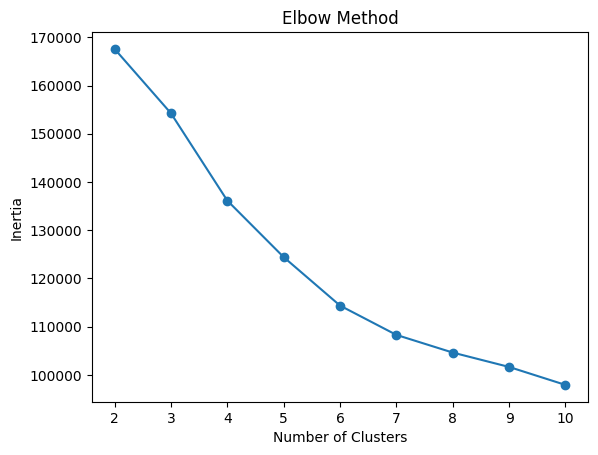


🎵 Cluster: Upbeat Pop
         Track   Artist
Feel Good Inc. Gorillaz
   Dirty Harry Gorillaz

🎵 Cluster: Feel-Good Dance
                                        Track   Artist
                              Rhinestone Eyes Gorillaz
New Gold (feat. Tame Impala and Bootie Brown) Gorillaz

🎵 Cluster: Chill & Mellow
                            Track                Artist
                 Under the Bridge Red Hot Chili Peppers
Nothing Else Matters (Remastered)             Metallica

🎵 Cluster: Melancholy Instrumentals
                Track    Artist
          Veridis Quo Daft Punk
Weird Fishes/ Arpeggi Radiohead


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("Spotify_Youtube.csv")

# Define numerical features for clustering
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

# Drop rows with missing values in those features
df_cleaned = df[features].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

inertia = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(2, 11)]
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# ---- FINAL CLUSTERING ----
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Map cluster names
cluster_names = {
    0: "Upbeat Pop",
    1: "Feel-Good Dance",
    2: "Melancholy Instrumentals",
    3: "Chill & Mellow"
}
df_cleaned['cluster_name'] = df_cleaned['cluster'].map(cluster_names)
df_cleaned.groupby('cluster')[features].mean()


# ---- JOIN WITH METADATA ----
df_subset = df.loc[df_cleaned.index, ['Track', 'Artist']]
df_result = pd.concat([df_subset.reset_index(drop=True), df_cleaned.reset_index(drop=True)], axis=1)

# ---- DISPLAY 2 SONGS FROM EACH CLUSTER ----
for label in df_result['cluster_name'].unique():
    print(f"\n🎵 Cluster: {label}")
    sample = df_result[df_result['cluster_name'] == label][['Track', 'Artist']].head(2)
    print(sample.to_string(index=False))
kmeans = KMeans(n_clusters=4, random_state=42)

